In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as num

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read FAO Food Loss csv files
food_loss_data = "../Resources/FAO_Food_Loss.csv"
food_loss = pd.read_csv(food_loss_data)
food_loss = pd.DataFrame(food_loss)
# Filter out the empty columns
food_loss_df = food_loss[["m49_code", "country", "commodity", "year", "loss_percentage", "food_supply_stage"]]
food_loss_df.head()

,m49_code,country,commodity,year,loss_percentage,food_supply_stage
0,104,Myanmar,"Rice, milled",2015,1.78,Storage
1,104,Myanmar,"Rice, milled",2015,11.77,Storage
2,104,Myanmar,"Rice, milled",2015,5.88,Storage
3,104,Myanmar,"Rice, milled",2015,3.57,Storage
4,104,Myanmar,"Rice, milled",2015,17.65,Storage


In [5]:
# Food groups (commodity)
commodity = food_loss_df['commodity'].unique()
print(len(commodity))

147


In [7]:
# Create food groups by commodity
food_group = {
    'Fruits': ['Tomatoes', 'Cucumbers and gherkins', 'Bananas', 'Plantains and cooking bananas', 'Other fruits, n.e.c.',
           'Papayas', 'Pineapples', 'Pears', 'Apples', 'Oranges', 'Mangoes, guavas and mangosteens',
           'Cantaloupes and other melons', 'Avocados', 'Pomelos and grapefruits', 'Lemons and limes',
           'Tangerines, mandarins, clementines', 'Grapes', 'Other tropical and subtropical fruits, n.e.c.',
           'Strawberries', 'Wine', 'Other citrus fruit, n.e.c.', 'Coconuts, in shell', 'Raspberries', 'Olives',
           'Juice of citrus fruit n.e.c.', 'Juice of lemon', 'Raisins', 'Blueberries', 'Kiwi fruit', 
           'Grape juice', 'Apple juice', 'Cranberries', 'Plums, dried', 'Other stone fruits','Persimmons',
           'Orange juice', 'Pineapple juice', 'Juice of lemon', 'Watermelons', 'Dates', 'Figs', 'Cherries',
           'Plums and sloes', 'Apricots','Areca nuts', 'Peaches and nectarines', 'Other pome fruits', 'Grapefruit juice',
           'Hazelnuts, in shell', 'Walnuts, in shell', 'Cashew nuts, in shell',  'Almonds, in shell', 'Pistachios, in shell'],
    'Vegetables': ['Cauliflowers and broccoli', 'Potatoes', 'Cabbages' 'Eggplants (aubergines)', 'Pumpkins, squash and gourds',
               'Okra', 'Carrots and turnips', 'Green garlic', 'Leeks and other alliaceous vegetables',
               'Onions and shallots, green', 'Spinach', 'Yams', 'Other vegetables, fresh n.e.c.', 'Cassava, fresh',
               'Lettuce and chicory', 'Chillies and peppers, dry (<i>Capsicum</i> spp., <i>Pimenta</i> spp.), raw',
               'Pepper (<i>Piper</i> spp.), raw', 'Cassava, dry', 'Sweet potatoes', 'Artichokes', 'Asparagus',
               'Edible roots and tubers with high starch or inulin content, n.e.c., fresh', 'Flour of cassava', 'Tapioca of cassava',
               'Vegetable products, fresh or dry n.e.c.', 'Sweet corn, frozen', 'Canned mushrooms',
               'Chillies and peppers, green (<i>Capsicum</i> spp. and <i>Pimenta</i> spp.)', 'Mushrooms and truffles',
               'Sweet corn, prepared or preserved', 'Sugar beet', 'Swedes, for forage',
               'Edible roots and tubers with high starch or inulin content, n.e.c., dry',
               'Other stimulant, spice and aromatic crops, n.e.c.'],
    'Dairy': ['Raw milk of cattle', 'Hen eggs in shell, fresh', 'Dairy products n.e.c.', 'Cheese from whole cow milk', 'Eggs, dried'],
    'Protein': ['Meat of cattle with the bone, fresh or chilled', 'Cattle', 'Eggs, dried','Meat of chickens, fresh or chilled',
            'Snails, fresh, chilled, frozen, dried, salted or in brine, except sea snails', 'Meat of goat, fresh or chilled', 'Camels',
            'Meat of goat, fresh or chilled (indigenous)', 'Sheep', 'Goats', 'Meat of pig with the bone, fresh or chilled',
            'Meat of sheep, fresh or chilled','Pig meat, cuts, salted, dried or smoked (bacon and ham)'],
    'Grains': ['Rice, milled', 'Rice', 'Wheat', 'Maize (corn)', 'Sorghum', 'Millet', 'Mixed grain', 'Fonio','Quinoa', 'Oats',
           'Broad beans and horse beans, green', 'Flour of triticale', 'Rye', 'Mustard seed', 'Safflower seed',
           'Uncooked pasta, not stuffed or otherwise prepared', 'Green corn (maize)', 'Sugar cane','Rape or colza seed',
           'Cottonseed', 'Sunflower seed', 'Soya bean oil', 'Sunflower-seed oil, crude','Sesame seed','Flour of buckwheat',
           'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw','Cocoa beans', 'Sugar and syrups n.e.c.'],
    'Legumes': ['Beans, dry', 'Other beans, green', 'Peas, green', 'Peas, dry', 'Barley', 'Cow peas, dry', 'Groundnuts, shelled',
            'Broad beans and horse beans, dry' 'Lentils, dry', 'Soya beans', 'Groundnuts, excluding shelled', 'Other pulses n.e.c.',
           'Chick peas, dry', 'Other legumes, for forage', 'Bambara beans, dry', 'Pigeon peas, dry']}

In [9]:
# Add food_group into data frame
food_loss_df['food_group'] = food_loss_df['commodity'].map({commodity: group for group, commodities in food_group.items() for commodity in commodities})

# Count food group total
food_group_count = food_loss_df['food_group'].value_counts()
print(food_group_count)

food_group
Grains        20685
Fruits         3085
Vegetables     2129
Legumes        1216
Dairy           147
Protein          75
Name: count, dtype: int64


In [11]:
# Group contries (147) into corresponding continent
continent = {
    'Asia': ['Myanmar', 'Burundi','Central Asia', 'Sri Lanka', 'Western Asia', 'China', 'Palestine', 'Azerbaijan', 'Southern Asia', 
             'South-Eastern Asia', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Kazakhstan', 'Jordan', 'Malaysia', 'Mali', 
             "Democratic People's Republic of Korea", 'Republic of Korea', "Lao People's Democratic Republic", 'Mauritania', 'Bahrain', 
             'Bangladesh', 'Armenia', 'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Timor-Leste', 'Saudi Arabia', 'Serbia', 'Viet Nam', 
             'Turkey', 'Syrian Arab Republic', 'Thailand'],
    'Africa': ['Western Africa', 'Cambodia', 'Algeria', 'Cameroon', 'Chad', 'Northern Africa', 'Africa', 'Democratic Republic of the Congo',
               'Sub-Saharan Africa', 'Benin', 'Ethiopia', 'Eritrea', 'Angola', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Haiti', "Côte d'Ivoire", 
               'Kenya', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 
               'Guinea-Bissau', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Sudan', 'Sudan', 'Eswatini', 'Togo', 'Tunisia', 'Egypt', 'Uganda',
               'Somalia', 'South Africa', 'Zimbabwe', 'Botswana', 'United Republic of Tanzania', 'Burkina Faso', 'Zambia'],
    'Americas': ['Canada', 'Cuba', 'Northern America', 'Mexico', 'Saint Kitts and Nevis', 'Saint Lucia', 'Trinidad and Tobago', 'Belize',
                 'United States of America', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama',
                 'Chile', 'Colombia', 'Ecuador', 'Argentina', 'Guyana', 'Latin America and the Caribbean', 'Paraguay', 'Peru', 
                 'Bolivia (Plurinational State of)', 'Brazil', 'Uruguay', 'Venezuela (Bolivarian Republic of)'],
    'Europe': ['Europe', 'Denmark', 'Finland', 'France', 'Germany', 'Italy', 'Norway', 'Sweden', 'Switzerland', 'Ukraine', 
               'United Kingdom of Great Britain and Northern Ireland'],
    'Australia': ['Fiji', 'Australia', 'Australia and New Zealand', 'New Zealand']}

In [13]:
# Add continent to data frame
food_loss_df['continent'] = food_loss_df['country'].map({country: group for group, countries in continent.items() for country in countries})
food_loss_df.head()

,m49_code,country,commodity,year,loss_percentage,food_supply_stage,food_group,continent
0,104,Myanmar,"Rice, milled",2015,1.78,Storage,Grains,Asia
1,104,Myanmar,"Rice, milled",2015,11.77,Storage,Grains,Asia
2,104,Myanmar,"Rice, milled",2015,5.88,Storage,Grains,Asia
3,104,Myanmar,"Rice, milled",2015,3.57,Storage,Grains,Asia
4,104,Myanmar,"Rice, milled",2015,17.65,Storage,Grains,Asia


In [15]:
# Count how many rows of data each country accounts for; how many each continent accounts for
country_group_count = food_loss_df['country'].value_counts()
print(country_group_count)

continent_group_count = food_loss_df['continent'].value_counts()
print(continent_group_count)

country
United States of America    3094
India                       1354
Ethiopia                    1064
Kenya                       1054
Uganda                       866
                            ... 
Bahrain                        1
Oman                           1
Saint Kitts and Nevis          1
Germany                        1
Gabon                          1
Name: count, Length: 127, dtype: int64
continent
Africa       19131
Asia          4746
Americas      3406
Europe         378
Australia       82
Name: count, dtype: int64


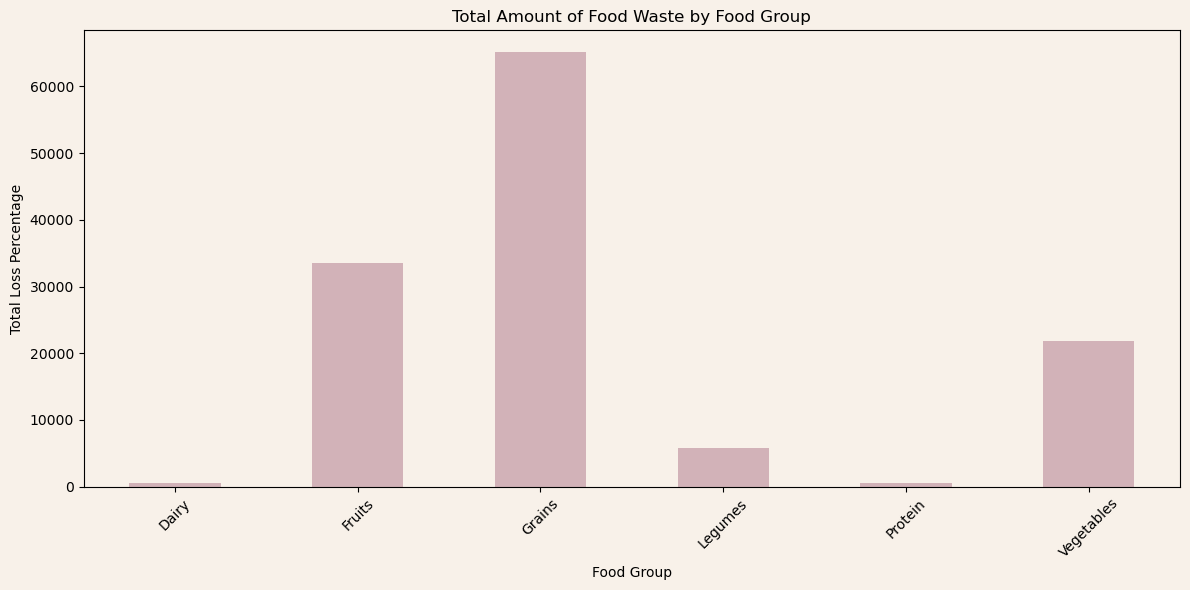

In [17]:
# TESTING FOR DIFFERENCES
food_group_waste = food_loss_df.groupby('food_group')['loss_percentage'].sum()

# Create a bar graph to visualize the total amount of food waste by food group
plt.figure(figsize=(12, 6))
food_group_waste.plot(kind='bar', color='#D2B2B8')
plt.title('Total Amount of Food Waste by Food Group')
plt.xlabel('Food Group')
plt.ylabel('Total Loss Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig
plt.savefig('viz/waste_by_food_group.png')

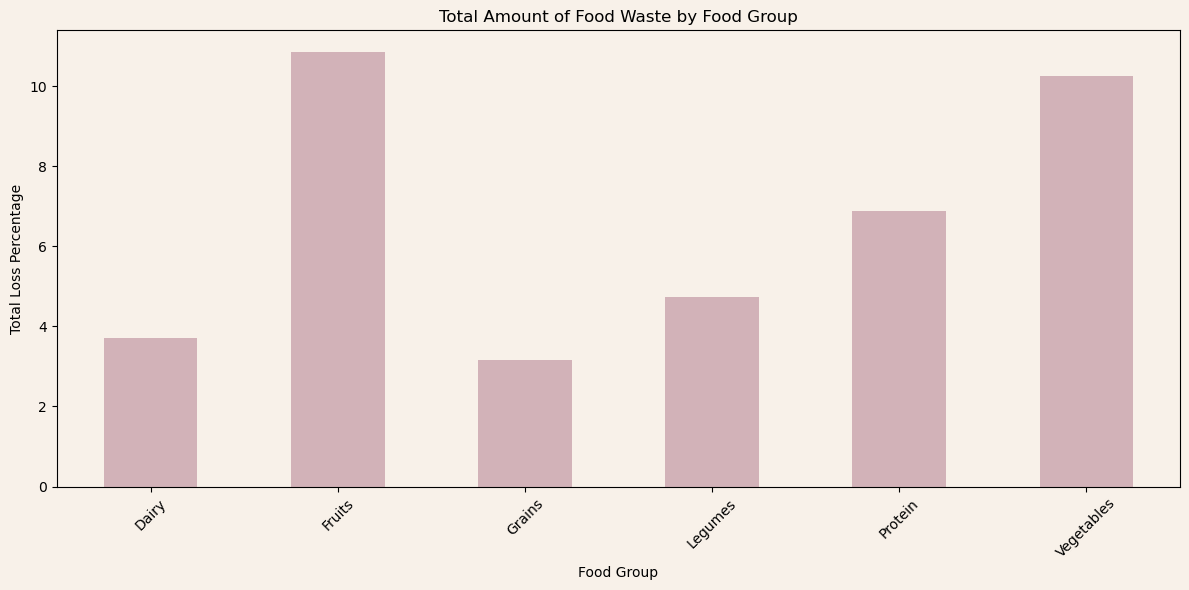

In [19]:
food_group_waste = food_loss_df.groupby('food_group')['loss_percentage'].mean()

# Create a bar graph to visualize the total amount of food waste by food group
plt.figure(figsize=(12, 6))
food_group_waste.plot(kind='bar', color='#D2B2B8')
plt.title('Total Amount of Food Waste by Food Group')
plt.xlabel('Food Group')
plt.ylabel('Total Loss Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig
plt.savefig('viz/waste_by_food_group.png')

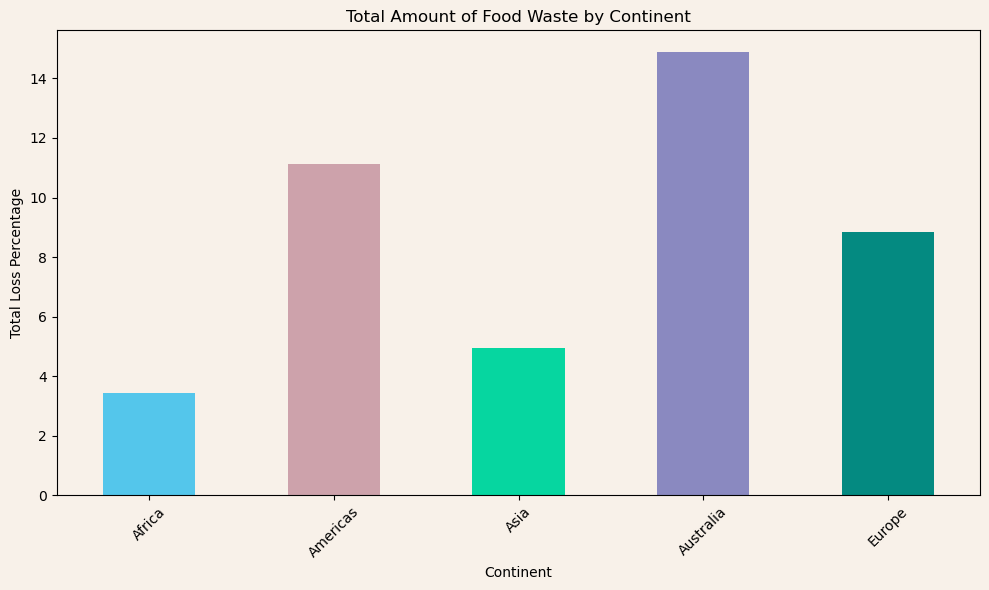

<Figure size 640x480 with 0 Axes>

In [21]:
continent_waste = food_loss_df.groupby('continent')['loss_percentage'].mean()
colors = {'Asia': '#06D6A0', 'Europe': '#048A81', 'Africa': '#54C6EB', 'Americas': '#CDA2AB', 'Australia': '#8A89C0'}

# Create a bar graph to visualize the total amount of food waste by continent
plt.figure(figsize=(10, 6))
continent_waste.plot(kind='bar', color=[colors[continent] for continent in continent_waste.index])
plt.title('Total Amount of Food Waste by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Loss Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig

plt.show()
plt.savefig('viz/waste_by_continent.png')

In [ ]:
# Pie Chart
custom_colors = ['#06D6A0', '#048A81', '#54C6EB', '#CDA2AB', '#8A89C0', '#F1D87E']
explode = (0, 0.1, 0, 0, 0, 0)

pie_chart = food_loss_df.groupby('food_group')['loss_percentage'].mean()

pie_chart.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=explode, colors=custom_colors)
plt.title('Food Wastage by Food Group')
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the figure
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.savefig('viz/food_group_waste.png')

In [35]:
top_countries = food_loss_df.groupby('country')['loss_percentage'].mean().nlargest(10)
print(top_countries)

country
Haiti                                 42.500000
Australia and New Zealand             42.000000
Venezuela (Bolivarian Republic of)    35.227273
Gabon                                 35.000000
Oman                                  35.000000
Canada                                30.500000
Africa                                30.000000
Saint Kitts and Nevis                 30.000000
Belize                                28.333333
Italy                                 25.425000
Name: loss_percentage, dtype: float64


<Figure size 3000x800 with 0 Axes>

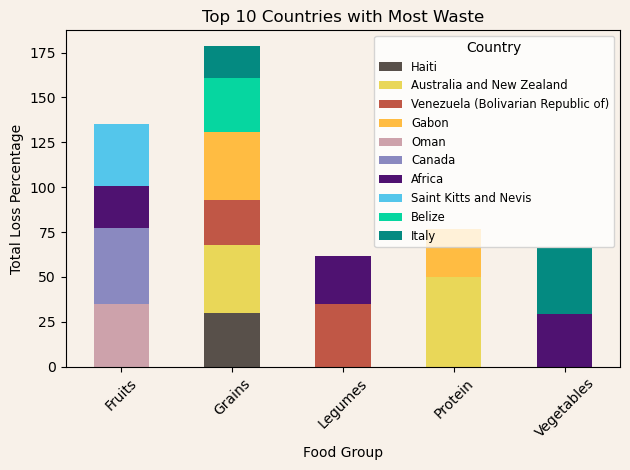

In [45]:
top_countries = food_loss_df.groupby('country')['loss_percentage'].mean().nlargest(10)
top_countries_data = food_loss_df[food_loss_df['country'].isin(top_countries.index)]
custom_colors = ['#58504A', '#E9D758', '#C05746', '#FFBC42', '#CDA2AB', '#8A89C0', '#4F1271', '#54C6EB', '#06D6A0', '#048A81']

# Stacked Bar Chart
plt.figure(figsize=(30, 8))
top_countries_data.pivot_table(index='food_group', columns='country', values='loss_percentage').plot(kind='bar', color=custom_colors, stacked=True)
plt.title('Top 10 Countries with Most Waste')
plt.xlabel('Food Group')
plt.ylabel('Total Loss Percentage')
plt.xticks(rotation=45)
plt.legend(title='Country', fontsize='small', loc='upper right', labels=top_countries.index)
plt.tight_layout()
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig
plt.savefig('viz/food_group_waste_by_top_10_countries.png')

<Figure size 1200x800 with 0 Axes>

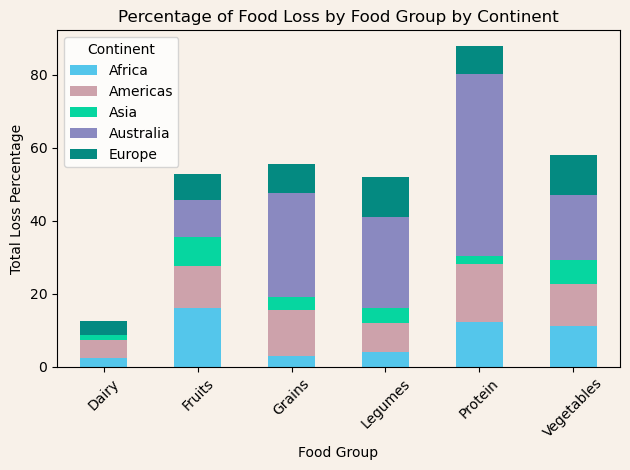

In [53]:
top_continents = food_loss_df.groupby('continent')['loss_percentage'].mean().nlargest(10)
top_continents_data = food_loss_df[food_loss_df['continent'].isin(top_continents.index)]
colors = {'Asia': '#06D6A0', 'Europe': '#048A81', 'Africa': '#54C6EB', 'Americas': '#CDA2AB', 'Australia': '#8A89C0'}
# Stacked Bar Chart
plt.figure(figsize=(12, 8))
top_continents_data.pivot_table(index='food_group', columns='continent', values='loss_percentage').plot(kind='bar',color=[colors[continent] for continent in continent_waste.index], stacked=True)
plt.title('Percentage of Food Loss by Food Group by Continent')
plt.xlabel('Food Group')
plt.ylabel('Total Loss Percentage')
plt.xticks(rotation=45)
plt.legend(title='Continent')
plt.tight_layout()
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig
plt.savefig('viz/food_group_waste_by_continent.png')

<Figure size 1200x800 with 0 Axes>

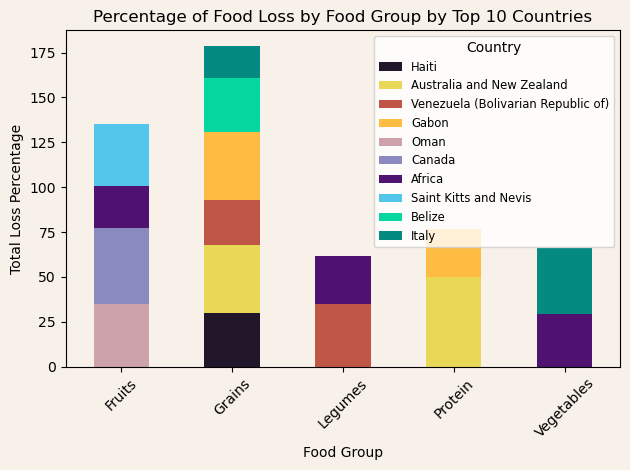

In [63]:
#COPY OF TOP_CONTINENTS BUT FOR COUNTRY
top_country02 = food_loss_df.groupby('country')['loss_percentage'].mean()
top_10_countries02 = top_country02.nlargest(10)
top_country_data02 = food_loss_df[food_loss_df['country'].isin(top_10_countries02.index)]

custom_colors = ['#22162B', '#E9D758', '#C05746', '#FFBC42', '#CDA2AB', '#8A89C0', '#4F1271', '#54C6EB', '#06D6A0', '#048A81']
# Stacked Bar Chart
# Stacked Bar Chart using the filtered data
plt.figure(figsize=(12, 8))
top_country_data02.pivot_table(index='food_group', columns='country', values='loss_percentage').plot(kind='bar', color=custom_colors, stacked=True)
plt.title('Percentage of Food Loss by Food Group by Top 10 Countries')
plt.xlabel('Food Group')
plt.ylabel('Total Loss Percentage')
plt.xticks(rotation=45)
plt.legend(title='Country', fontsize='small', loc='upper right', labels=top_10_countries02.index)
plt.tight_layout()
plt.gca().set_facecolor('#F8F1E9')  # Set the background color of the plot area
plt.gcf().set_facecolor('#F8F1E9')  # Set the background color of the fig
plt.savefig('viz/food_group_waste_by_top_10_countries.png')